# CapsNets on Fashion Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_fashion_mnist

In [3]:
(X_train, y_train), (X_test , y_test) = load_fashion_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

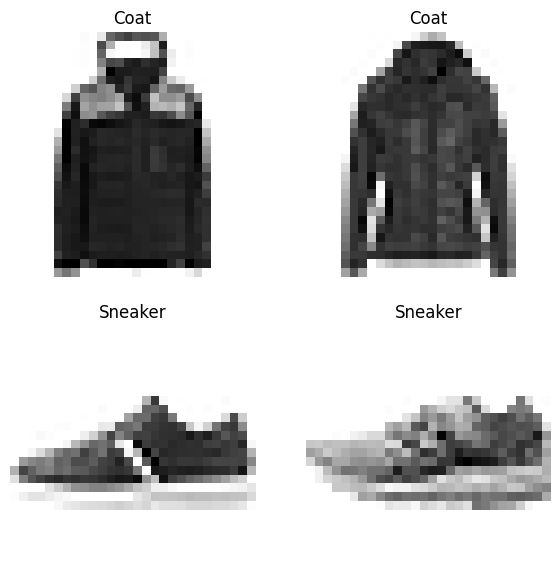

In [5]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [6]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [7]:
params = {
    "epochs": 15,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

model = CapsNet(**params)
model._name = "CapsNet-Fashion-MNIST"
model.compile()
model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 1/15: 100%|██████████| 16/16 [00:10<00:00,  3.22it/s, Evaluating ...]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 6/15: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 6 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.63671875, 0.724609375, 0.79296875, 0.806640625, 0.8212890625]),
 'precision': ListWrapper([0.6456010468412822, 0.7632861567587205, 0.8004465225014867, 0.8182922081221266, 0.8297732975617539]),
 'recall': ListWrapper([0.63671875, 0.724609375, 0.79296875, 0.806640625, 0.8212890625]),
 'f1': ListWrapper([0.5878439352554576, 0.7030147010813225, 0.7897986887858868, 0.7966930839859216, 0.8139492380322505]),
 'loss': ListWrapper([0.9142509661614895, 0.42897509410977364, 0.30989255756139755, 0.26109511964023113, 0.2332520904019475]),
 'val_accuracy': ListWrapper([0.576171875, 0.69921875, 0.734375, 0.748046875, 0.7578125]),
 'val_precision': ListWrapper([0.6208127324599707, 0.6930498519853988, 0.7373749096604053, 0.7449299959635735, 0.7587726857819548]),
 'val_recall': ListWrapper([0.576171875, 0.69921875, 0.734375, 0.748046875, 0.7578125]),
 'val_f1': ListWrapper([0.5044487515701217, 0.6758234564167995, 0.7326629814070423, 0.7390053166420012, 0.7503777191622479]),
 

,precision,recall,f1-score,support
0,0.850000,0.910714,0.879310,56.000000
1,0.962264,0.962264,0.962264,53.000000
2,0.618182,0.478873,0.539683,71.000000
3,0.784314,0.869565,0.824742,46.000000
4,0.589041,0.741379,0.656489,58.000000
5,0.900000,0.900000,0.900000,40.000000
6,0.358974,0.297872,0.325581,47.000000
7,0.869565,0.833333,0.851064,48.000000
8,0.930233,0.888889,0.909091,45.000000
9,0.846154,0.916667,0.880000,48.000000


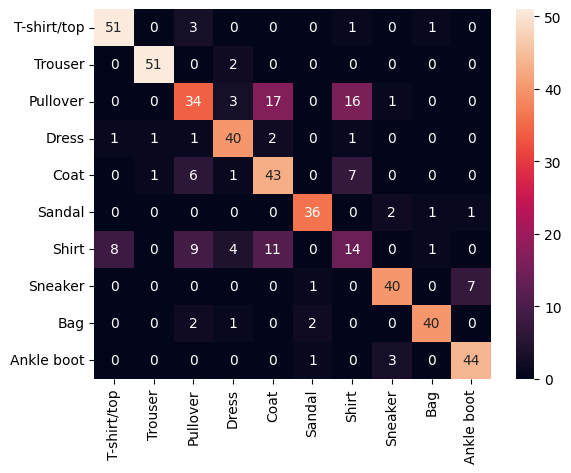

In [9]:
model.evaluate(X_test, y_test, class_names)

## Loading and saving

Saving model under /saved_models/CapsNet-Fashion-MNIST


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


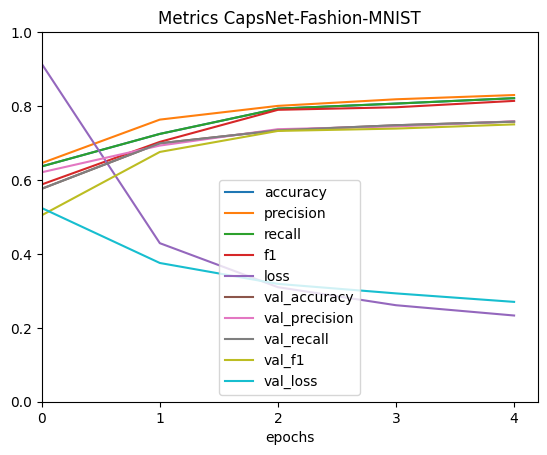

In [10]:
model.save()

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-Fashion-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
